<a href="https://colab.research.google.com/github/Muosvr/fastai_presentation/blob/master/Fastai_v1_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Fast.ai v1_halloween edition

Let's find out whether that house in the picture is haunted or not

# Google Colab

Getting Image data


Javascript for scraping from Google Image in browser
```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



We will first install Pytorch and than the fastai library. Fastai is built ontop of Pytorch which is itself a deep learning library that allows for  matrix computation on the GPU that is necessary to accelerate deep learning training

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 30kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60fa8000 @  0x7efc94a022a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [0]:
!pip install fastai

    100% |████████████████████████████████| 112kB 6.4MB/s 
    100% |████████████████████████████████| 61kB 25.7MB/s 
    100% |████████████████████████████████| 9.0MB 4.3MB/s 
    100% |████████████████████████████████| 112kB 27.4MB/s 
    100% |████████████████████████████████| 112kB 31.4MB/s 
    100% |████████████████████████████████| 1.0MB 19.0MB/s 
    100% |████████████████████████████████| 2.2MB 15.1MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - done
  Stored in directory: /root/.cache/pip/wheels/b9/96/bc/e2acadc6bbfe57a1f631a34ca4ce6dd057af059b8d6878202b
Successfully built prometheus-client
google-colab 0.0.1a1 has requirement notebook~=5.2.0, but you'll have notebook 5.7.0 which is incompatible.
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installati

Here we will import the necessary library for the notebook to use

In [0]:
from fastai import *
from fastai.vision import *
import os

The code below allows yoou to upload files from your computer to this notebook. It is copied from sample code snipets from Google colab. You can find it by searching "upload files" on the side bar

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving haunted_or_not_test.txt to haunted_or_not_test.txt
User uploaded file "haunted_or_not_test.txt" with length 9139 bytes


Google colab has some basic bash comman build in such as ls, mkdir, and rm. For more advanced commands you can access everything you can do in a terminal by prepending a "!" to the codes. That was how we installed all the packages ealier.

In [0]:
ls

castle.txt  haunted_castle.txt  haunted_or_not_test.txt  sample_data/
data/       haunted_house.txt   house.txt


Now let's create an array of classes and use that to create two folders and downloard about 200 images into each category

In [0]:
classes = ['haunted_house', 'house']

In [0]:
mkdir data
path = Path('data') #creating a path object. Path is unqiue class to fastai, it makes it easier to manipulate file paths. 

Whenever you see a function you don't understand, put ? in front of it to see a basic explaination and ?? to see a more thorough explaination as well as link to the source code. You can also do doc(something_you_don't_understand) to look at the documentation

In [2]:
??Path

Object `Path` not found.


In [0]:
#create folders and download images from urls
for name in classes:
  url_file = name + '.txt'
  dest = 'data/' + name
  if not os.path.exists(dest):
    os.makedirs(dest)
  download_images(url_file, dest, max_pics=200)

Error https://cdn.abcotvs.com/dip/images/2107145_061617-cc-haunted-house-1280-img.jpg?w=630&r=16:9 'content-length'
Error https://r.hswstatic.com/w_907/gif/podcasts/missedinhistory-podcasts-wp-content-uploads-sites-99-2015-07-Haunted_Mansion_Exterior.jpg 'content-length'
Error https://carnagehauntedhouse.com/wp-content/uploads/2017/05/crnage-image-glowing-eyes.png 'content-length'
Error https://www.cityofthedeadhaunt.com/2018/img/Avatar.jpg 'content-length'
Error http://www.hellsgate.com/gallery-home-2016/HellsGate-Haunted-House_07.jpg 'content-length'
Error https://www.telegraph.co.uk/content/dam/news/2016/04/04/Haunted-Mansion-in-Disneyland-Paris_trans_NvBQzQNjv4BqjE4rHJRh55ptlvEMe93lY8GD6Khni0F2gT2FTu8BRhA.jpg?imwidth=450 'content-length'
Error https://cdn.abcotvs.com/dip/images/1042201_102015-cc-McConnell-Thumb-3.jpg?w=630&r=16:9 'content-length'
Error https://imagesvc.timeincapp.com/v3/mm/image?url=https%3A%2F%2Fpeopledotcom.files.wordpress.com%2F2018%2F09%2Fstranger-things-5.jpg%

Error https://images.pexels.com/photos/106399/pexels-photo-106399.jpeg?cs=srgb&dl=architecture-beautiful-exterior-106399.jpg&fm=jpg 'content-length'
Error https://images.pexels.com/photos/462358/pexels-photo-462358.jpeg?cs=srgb&dl=garden-house-lawn-462358.jpg&fm=jpg 'content-length'
Error https://images.pexels.com/photos/186077/pexels-photo-186077.jpeg?cs=srgb&dl=architecture-building-driveway-186077.jpg&fm=jpg 'content-length'
Error https://cdn.abcotvs.com/dip/images/4041475_082318-kgo-sunset-idea-house-front-img.jpg 'content-length'
Error https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/08/08/105383459-1533725826915gettyimages-1001904568.530x298.jpeg?v=1533725885 'content-length'
Error https://d2skuhm0vrry40.cloudfront.net/2015/articles/1/8/6/5/2/4/9/skyrim-houses-how-to-buy-houses-in-whiterun-windhelm-riften-solitude-markarth-1477649051426.jpg/EG11/thumbnail/1920x1080/format/jpg/1939883.jpg 'content-length'
Error https://bloximages.chicago2.vip.townnews.com/pre

Note the "!" make turns the next three cells into bash commands

In [0]:
!ls data

haunted_house  house  models


In [0]:
!cd data/haunted_house; ls | wc -l #another bash command. This counts how many files there are in the directory
#note the ";" in above code separate out two lines of code so they can all be written in one line following the "!"

189


In [0]:
!cd data/house; ls | wc -l #same as above, for a different directory

187


In [0]:
#download test set
download_images('haunted_or_not_test.txt', 'test')

Error https://static-house.jumia.ug/static/p/no-name-2236-524541-1-catalog.jpg 'content-length'
Error https://images.pexels.com/photos/259597/pexels-photo-259597.jpeg?auto=compress&cs=tinysrgb&h=350 'content-length'
Error https://bloximages.newyork1.vip.townnews.com/newspressnow.com/content/tncms/assets/v3/editorial/6/3e/63e6ad4d-b9da-5ded-b428-2a5737c52530/5bcfd9a377b47.image.jpg?resize=400%2C300 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=556802944353309 'content-length'
Error http://tejaratebartar.net/wp-content/uploads/2018/07/13-scariest-haunted-houses-in-america-business-insider-for-real-haunted-houses-intended-for-house.jpg 'content-length'
Error https://www.thrillvania.com/wp-content/uploads/2014/03/14big-600x600.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=200299390128568 'content-length'


In [0]:
for name in file_names:
  class_name = name[:-4]
  print(class_name)
  verify_images(path/class_name, delete=True, max_workers=8)

castle


cannot identify image file '/content/data/castle/00000003.jpg'
cannot identify image file '/content/data/castle/00000026.jpg'
cannot identify image file '/content/data/castle/00000110.jpg'
cannot identify image file '/content/data/castle/00000179.jpg'
cannot identify image file '/content/data/castle/00000004.jpg'
cannot identify image file '/content/data/castle/00000112.jpg'
haunted_castle


cannot identify image file '/content/data/haunted_castle/00000189.jpg'
cannot identify image file '/content/data/haunted_castle/00000113.jpg'
cannot identify image file '/content/data/haunted_castle/00000152.jpg'
cannot identify image file '/content/data/haunted_castle/00000021.jpg'
cannot identify image file '/content/data/haunted_castle/00000023.jpg'
haunted_house


cannot identify image file '/content/data/haunted_house/00000099.jpg'
cannot identify image file '/content/data/haunted_house/00000132.jpg'
cannot identify image file '/content/data/haunted_house/00000087.jpg'
cannot identify image file '/content/data/haunted_house/00000173.jpg'
cannot identify image file '/content/data/haunted_house/00000198.jpg'
cannot identify image file '/content/data/haunted_house/00000006.jpg'
cannot identify image file '/content/data/haunted_house/00000017.jpg'
cannot identify image file '/content/data/haunted_house/00000027.jpg'
cannot identify image file '/content/data/haunted_house/00000020.jpg'
house


cannot identify image file '/content/data/house/00000099.jpg'
cannot identify image file '/content/data/house/00000093.jpg'
cannot identify image file '/content/data/house/00000077.jpg'
cannot identify image file '/content/data/house/00000013.jpg'
cannot identify image file '/content/data/house/00000148.jpg'
cannot identify image file '/content/data/house/00000167.jpg'
cannot identify image file '/content/data/house/00000151.jpg'
cannot identify image file '/content/data/house/00000007.jpg'
cannot identify image file '/content/data/house/00000121.jpg'
cannot identify image file '/content/data/house/00000030.jpg'
cannot identify image file '/content/data/house/00000192.jpg'
cannot identify image file '/content/data/house/00000060.jpg'
cannot identify image file '/content/data/house/00000070.jpg'


In [0]:
verify_images('test', delete=True)

cannot identify image file '/content/test/00000043.jpg'
cannot identify image file '/content/test/00000011.jpg'
cannot identify image file '/content/test/00000008.jpg'
cannot identify image file '/content/test/00000072.jpg'


# View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [0]:
data.classes

['haunted_house', 'house']

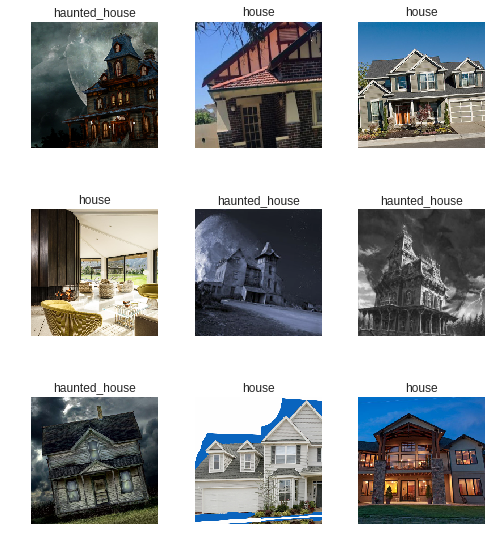

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 276, 81)

In [0]:
bs = 64 #batch size

# Training

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

Total time: 01:26
epoch  train_loss  valid_loss  error_rate
1      0.657002    0.394503    0.160494    (00:21)
2      0.448516    0.522240    0.197531    (00:21)
3      0.354918    0.390728    0.123457    (00:21)
4      0.288377    0.309914    0.123457    (00:21)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

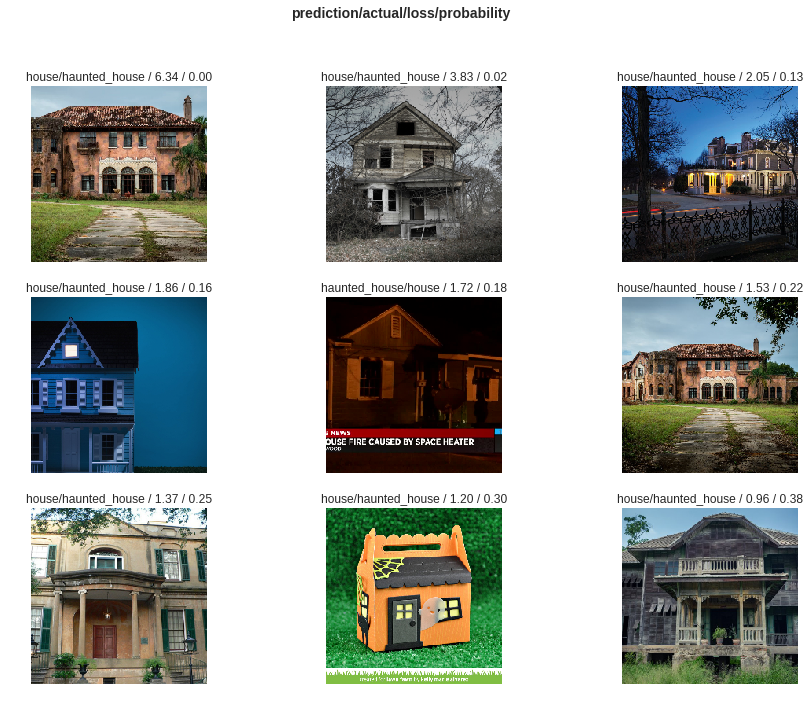

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
data.classes

['haunted_house', 'house']

In [0]:
import glob
filenames = glob.glob('test/*')

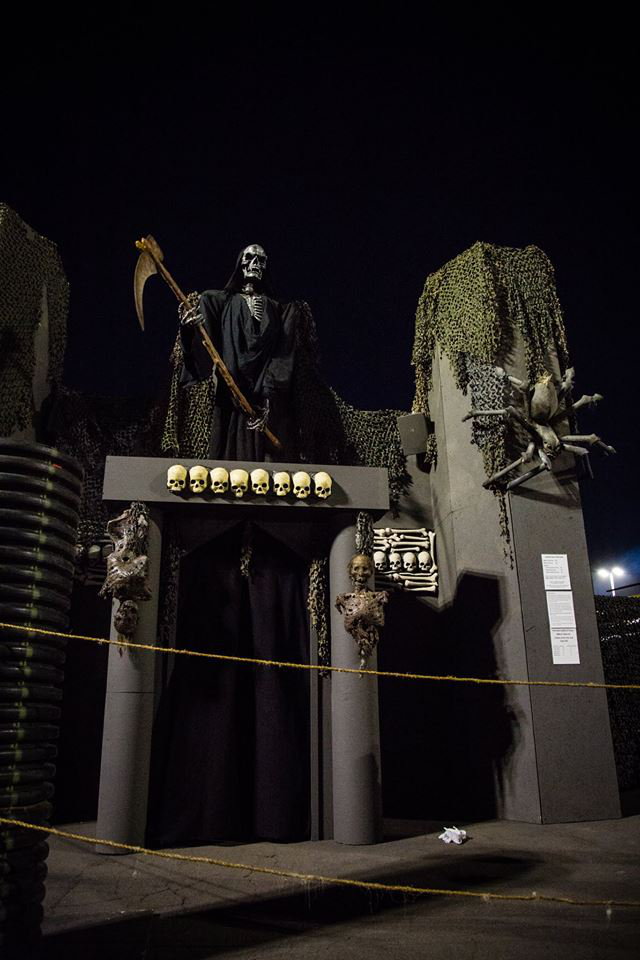

In [0]:
random_file = random.choice(filenames)
img = open_image(random_file)
img

In [0]:
pre_class, pred_idx, outputs = learn.predict(img)
pre_class

'haunted_house'